In [3]:
# install h2o
!pip install  -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
  The repository located at h2o-release.s3.amazonaws.com is not a trusted or secure host and is being ignored. If this repository is available via HTTPS we recommend you use HTTPS instead, otherwise you may silence this warning and allow it anyway with '--trusted-host h2o-release.s3.amazonaws.com'.
    100% |████████████████████████████████| 120.9MB 214kB/s 
  The repository located at h2o-release.s3.amazonaws.com is not a trusted or secure host and is being ignored. If this repository is available via HTTPS we recommend you use HTTPS instead, otherwise you may silence this warning and allow it anyway with '--trusted-host h2o-release.s3.amazonaws.com'.
  Stored in directory: /root/.cache/pip/wheels/76/73/b8/8639930fbc56e9f26fac210f5e65dbe05a0c39396ddaf4a685
Successfully built h2o


In [0]:
# matplotlib inline
import pandas as pd # for dataframe
import numpy as np # for array
import matplotlib.pyplot as plt # for plot
import datetime as dt #for getting days, hour
from scipy.stats import mannwhitneyu # for hypothsis test
import h2o
import os
from h2o.estimators import H2ORandomForestEstimator # for modeling
from sklearn.linear_model import LinearRegression # for polynomial fitting
from sklearn.metrics import mean_squared_error, r2_score # for polynomial fitting evaluation
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns


# Question 1

**- Programmatically download and load into your favorite analytical tool the trip data for September 2015.**

In [16]:
# Question 1
# Question 1(a)
# down load data from website
def downLoadFromWeb(url):
    data = pd.read_csv(url)
#     print(data.head())
    return data
   
# load data
if os.path.exists('green_tripdata_2015-09.csv'): # check if data already be downloaded
    data_green = pd.read_csv("green_tripdata_2015-09.csv")
else: # download data set if not in the local disk
    url_green = "https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv"
    data_green = downLoadFromWeb(url_green)

# report # of row and col
# Question 1(b)

print('green_row', 'green_col')
print(data_green.shape[0], data_green.shape[1])

# Description of data
print(data_green.columns)
data_green.describe()

green_row green_col
1494926 21
Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')


,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,0.0,1.494926e+06,1.494926e+06,1.494926e+06,1.494922e+06
mean,1.782045e+00,1.097653e+00,-7.383084e+01,4.069114e+01,-7.383728e+01,4.069291e+01,1.370598e+00,2.968141e+00,1.254320e+01,3.512800e-01,4.866408e-01,1.235727e+00,1.231047e-01,NaN,2.920991e-01,1.503215e+01,1.540559e+00,1.022353e+00
std,4.128570e-01,6.359437e-01,2.776082e+00,1.530882e+00,2.677911e+00,1.476698e+00,1.039426e+00,3.076621e+00,1.008278e+01,3.663096e-01,8.504473e-02,2.431476e+00,8.910137e-01,NaN,5.074009e-02,1.155316e+01,5.232935e-01,1.478288e-01
min,1.000000e+00,1.000000e+00,-8.331908e+01,0.000000e+00,-8.342784e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.750000e+02,-1.000000e+00,-5.000000e-01,-5.000000e+01,-1.529000e+01,NaN,-3.000000e-01,-4.750000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395961e+01,4.069895e+01,-7.396782e+01,4.069878e+01,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.160000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394536e+01,4.074674e+01,-7.394504e+01,4.074728e+01,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391748e+01,4.080255e+01,-7.391013e+01,4.079015e+01,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.317726e+01,0.000000e+00,4.279934e+01,9.000000e+00,6.031000e+02,5.805000e+02,1.200000e+01,5.000000e-01,3.000000e+02,9.575000e+01,NaN,3.000000e-01,5.813000e+02,5.000000e+00,2.000000e+00


 **- Report how many rows and columns of data you have loaded. ** 


> 1494926 rows and 21 columns

Based on the description of the data set, I found that the minimum values of Tip_amount, Tolls_amount, improvement_surcharge, and the total amount is negative. And most of Ehail_fee are nans. The dataset needs to be cleaned up. 

# Question 2

**- Plot a histogram of the number of the trip distance (“Trip Distance”).**

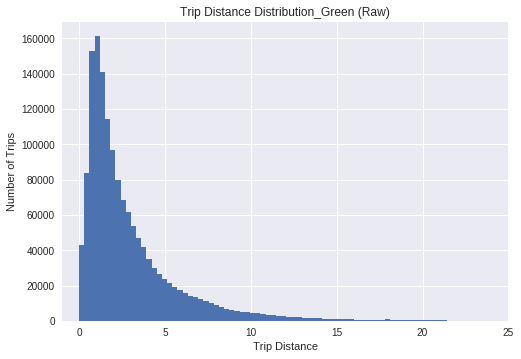

In [17]:
# plot histogram
num_bins = 2000
plt.hist(data_green.Trip_distance, num_bins)

# Add title and axis names
plt.title('Trip Distance Distribution_Green (Raw)')
plt.xlabel('Trip Distance')
plt.ylabel('Number of Trips')
plt.xlim((-1, 25))
plt.show()

#### Findings 

The trip distance follows a right-skewed distribution that its mean is larger than its median. The samples are not normally distributed due to the distance cannot be negative. The sample with negative values in the data description table might be incorrectly reported. Therefore, I did the data cleaning before the following analysis. Then go back to look at its distribution again.


Drop 0.00 % based on RateCodeID
Total_amount
Fare_amount
improvement_surcharge
Drop 0.00 % based on Tip_amount
Drop 0.00 % based on Tolls_amount
MTA_tax


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1494875
Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'improvement_surcharge', 'Total_amount',
       'Payment_type', 'Trip_type '],
      dtype='object')


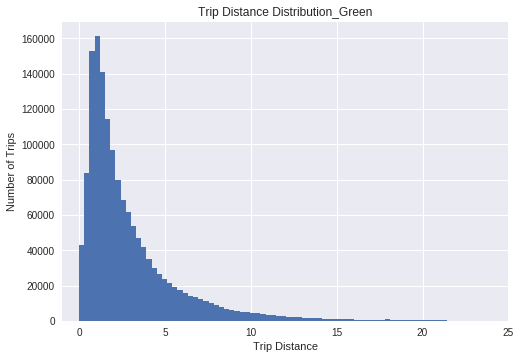

In [19]:
# Question 2
# cleaning up function
def dataClean(df):
    
    # generate a new dataframe
    df_clean = df.copy()
    rowNum = df_clean.shape[0]
    
    # drop Ehail_fee since most of them are nans
    if 'Ehail_fee' in df_clean.columns:
        df_clean.drop('Ehail_fee', axis = 1, inplace = True)
        
    # drop missing value in Trip_type because of randomly missing and the percentage is really small
    df_clean = df_clean.dropna(subset=['Trip_type '])
    pct = 100*float(rowNum - df_clean.shape[0])/rowNum
    rowNum = df_clean.shape[0]
    
    # drop outliers based on RateCodeID
    if df_clean[(df_clean['RateCodeID'] < 1) | (df_clean['RateCodeID'] > 6)].shape[0]/rowNum < 0.001:
        df_clean.drop(df_clean[(df_clean['RateCodeID'] < 1) | (df_clean['RateCodeID'] > 6)].index, inplace = True)
        rowNum = df_clean.shape[0]
        pct = 100*float(df_clean[(df_clean['RateCodeID'] < 1) | (df_clean['RateCodeID'] > 6)].shape[0]/rowNum)
        print(f'Drop {pct:.2f} % based on RateCodeID')
    else:
        df_clean[(df_clean['RateCodeID'] < 1) | (df_clean['RateCodeID'] > 6)] = 2
        
    # First round: Total_amount, Fare_amount, improvement_surcharge, Tip_amount, and Tolls_amount outlier drop or taking abs
    selectCol = ['Total_amount', 'Fare_amount', 'improvement_surcharge', 'Tip_amount', 'Tolls_amount', 'MTA_tax']
    for iCol in selectCol:
        threshold = 0
        if (df_clean[df_clean[iCol] < threshold].shape[0]/rowNum)>0.001:
            df_clean[iCol] = df_clean[iCol].abs()
            print(iCol)
        else:
            df_clean.drop(df_clean[df_clean[iCol] < threshold].index, inplace = True)
            pct = 100*float(df_clean[df_clean[iCol] < threshold].shape[0]/rowNum)
            print(f'Drop {pct:.2f} % based on {iCol}')
            
    # update rowNum since the size is changed
    rowNum = df_clean.shape[0]
    
    # Second round: drop if total_amount < 2.5
    pct = float(df_clean[df_clean['Total_amount'] < 2.5].shape[0]/rowNum)
    if pct < 0.001:# drop  
        df_clean.drop(df_clean[df_clean['Total_amount'] < 2.5].index, inplace = True)
    else:
        df_clean['Total_amount'][df_clean['Total_amount'] < 2.5] = df_clean['Total_amount'].median()
        
    # convert categorical to numeric
    if df_clean.Store_and_fwd_flag.dtype.name != 'int64':
        df_clean['Store_and_fwd_flag'] = (df_clean.Store_and_fwd_flag == 'Y')*1
        return df_clean

data_raw = data_green.copy()
data_green_clean = dataClean(data_green)
print(data_green_clean.shape[0])
print(data_green_clean.columns)

#zoom in
plt.hist(data_green.Trip_distance, num_bins)

# Add title and axis names
plt.title('Trip Distance Distribution_Green')
plt.xlabel('Trip Distance')
plt.ylabel('Number of Trips')
plt.xlim((-1, 25))
plt.show()

After the data cleaning, the distribution of trip distance doesn't have too many changes.

#Question 3

**- Report mean and median trip distance grouped by hour of day.**

Let's generate some new features from the cleaned data: pickup_time, dropoff_time, pickup_time_hour, dropoff_time_hour, Trip_duration_minutes (will be converted to hours when calculate speed), Speed, Airport_pick_or_drop, Tip_percentage, pickup_date, pickup_day_of_week. These features are appended to the raw data.
   #### Note: 
   * Trip_duration_minutes: due to most trips are within 1 hour, calculated hour will be tiny. Therefore, I used minutes here for easily filtering the duration less than 1 minute.
   
   * Speed: speed is mile per hour
   
   * Airport_pick_or_drop: Let's return numeric data for this feature, so that we don't have to convert them to numeric data. 
   

In [22]:
# Question 3(a)

def if_NYCairport(r):
    JFK = [40.651488, -73.796020, 40.640238, -73.773722]
    EWR = [40.696700, -74.184933, 40.685991, -74.173525]
    LAG = [40.775482, -73.879113, 40.771039, -73.868740]

    if (r['Pickup_latitude'] < JFK[0] and r['Pickup_latitude'] > JFK[2]  \
        and r['Pickup_longitude'] < JFK[3] and r['Pickup_longitude'] > JFK[1]) \
        or (r['Dropoff_latitude'] < JFK[0] and r['Dropoff_latitude'] > JFK[2] \
        and r['Dropoff_longitude'] < JFK[3] and r['Dropoff_longitude'] > JFK[1]):
        return 1
    elif (r['Pickup_latitude'] < EWR[0] and r['Pickup_latitude'] > EWR[2] \
        and r['Pickup_longitude'] < EWR[3] and r['Pickup_longitude'] > EWR[1]) \
        or (r['Dropoff_latitude'] < EWR[0] and r['Dropoff_latitude'] > EWR[2] \
        and r['Dropoff_longitude'] < EWR[3] and r['Dropoff_longitude'] > EWR[1]):
        return 2
    elif (r['Pickup_latitude'] < LAG[0] and r['Pickup_latitude'] > LAG[2] \
        and r['Pickup_longitude'] < LAG[3] and r['Pickup_longitude'] > LAG[1]) \
        or (r['Dropoff_latitude'] < LAG[0] and r['Dropoff_latitude'] > LAG[2] \
        and r['Dropoff_longitude'] < LAG[3] and r['Dropoff_longitude'] > LAG[1]):
        return 3
    else:
        return 0 # not airport trip
    
# pull out features
def featureExtra(df):
    
    # hours
    df['pickup_time'] = df['lpep_pickup_datetime'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
    df['dropoff_time'] = df['Lpep_dropoff_datetime'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
    df['pickup_time_hour'] = df['pickup_time'].apply(lambda x: x.hour)
    df['dropoff_time_hour'] = df['dropoff_time'].apply(lambda x: x.hour)
    
    # duration in mins
    df['Trip_duration_minute'] = (df['dropoff_time'] - df['pickup_time']).apply(lambda x: int(x.total_seconds()/60))
    df['Trip_duration_minute'][df['Trip_duration_minute'] == 0] = 1 # if the duration less than 1 minute, assign 1
      
    # calculate the speed = distance/duration   (mph)
    df['Speed'] = df['Trip_distance']/df['Trip_duration_minute']*60
    
    # Drop index with speed larger than 250 mile/h to limit the speed in a reasonable range
    df.drop(df[df['Speed'] > 250].index, inplace=True)
    
    # is it an airport trip, if yes, which airport
    df['Airport_pick_or_drop'] = df.apply(if_NYCairport, axis=1)
    
    # Tip_percentage
    df['Tip_percentage'] = df['Tip_amount'] / df['Total_amount']
    df['pickup_date'] = df['pickup_time'].apply(lambda x: dt.date(x.year, x.month, x.day))
    
    # Extract pickup day of the week, 0 is Sunday and 6 is Saturday
    df['pickup_day_of_week'] = df['pickup_time'].apply(lambda x: x.isocalendar()[2])

    return df

data_green_clean = featureExtra(data_green_clean)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


   ### Then, let's generate a new data frame to store the grouped data.

In [0]:
# build a new dataframe to store mean,median features
def featureGroup(df):
    # group by pickup_time_hour
    trip_group = pd.DataFrame(columns=['Trip_distance_mean', 'Trip_distance_median', 'Trip_duration_minute_mean'])
    trip_group['Trip_distance_mean']= df[['Trip_distance', 'pickup_time_hour']].groupby('pickup_time_hour').mean()['Trip_distance'].values
    trip_group['Trip_distance_median'] = df[['Trip_distance', 'pickup_time_hour']].groupby('pickup_time_hour').median()['Trip_distance'].values
    trip_group['Trip_duration_minute_mean'] = df[['Trip_duration_minute', 'pickup_time_hour']].groupby('pickup_time_hour').mean()['Trip_duration_minute'].values
    trip_group['Speed_mean'] = df[['Speed', 'pickup_time_hour']].groupby('pickup_time_hour').mean()['Speed'].values
    
#     print(df.Speed.describe())
#     print(trip_group.Speed_mean)
    trip_group['Fare_mean'] = df[['Fare_amount', 'pickup_time_hour']].groupby('pickup_time_hour').mean()['Fare_amount'].values
    trip_group['Tip_mean'] = df[['Tip_amount', 'pickup_time_hour']].groupby('pickup_time_hour').mean()['Tip_amount'].values
    trip_group['Total_mean'] = df[['Total_amount', 'pickup_time_hour']].groupby('pickup_time_hour').mean()['Total_amount'].values
    trip_group['Extra_mean'] = df[['Extra', 'pickup_time_hour']].groupby('pickup_time_hour').mean()['Extra'].values
    
    # calculate credit card usage ratio
    df_creditCard = df[df['Payment_type']==1].copy()
    countAll = df[['Payment_type', 'pickup_time_hour']].groupby(['pickup_time_hour']).count()
    countCredit = df_creditCard[['Payment_type', 'pickup_time_hour']].groupby(['pickup_time_hour']).count()

    trip_group['Credit_ratio'] = 100*(countCredit/countAll).values.squeeze()
    return trip_group

trip_df_pickup = featureGroup(data_green_clean)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


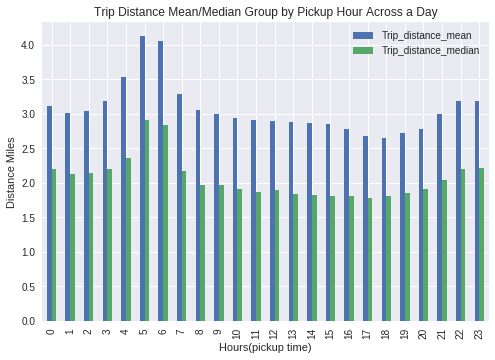

In [26]:
# bar plot mean and median
p1 = trip_df_pickup.plot.bar(y = ['Trip_distance_mean', 'Trip_distance_median'])
p1.set_xlabel('Hours(pickup time)')
p1.set_ylabel('Distance Miles')
p1.set_title('Trip Distance Mean/Median Group by Pickup Hour Across a Day')
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


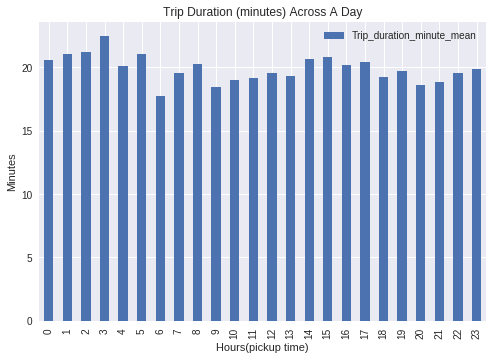

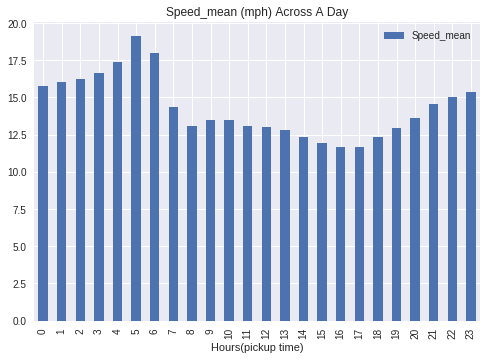

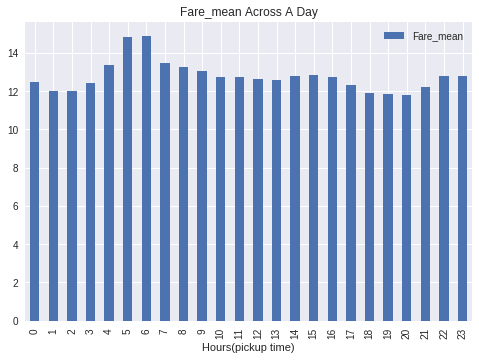

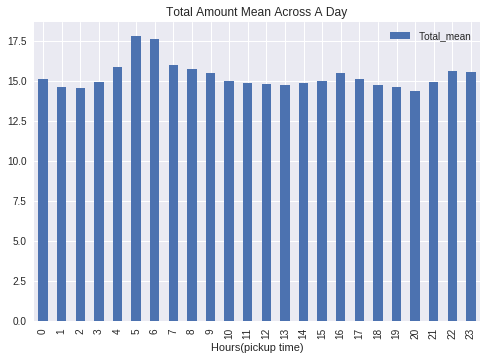

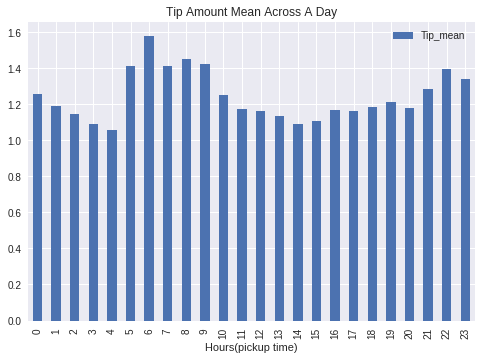

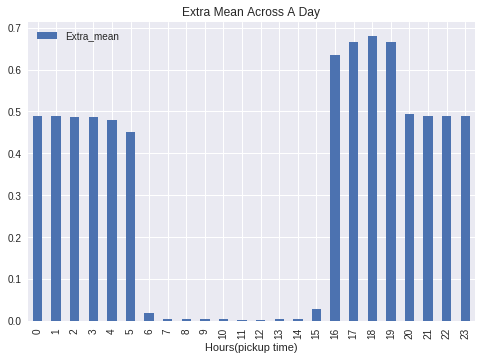

In [27]:
# bar plot of other features
p1 = trip_df_pickup.plot.bar(y=['Trip_duration_minute_mean'])
p1.set_xlabel('Hours(pickup time)')
p1.set_ylabel('Minutes')
p1.set_title('Trip Duration (minutes) Across A Day')
plt.show()

p1 = trip_df_pickup.plot.bar(y=['Speed_mean'])
p1.set_xlabel('Hours(pickup time)')
p1.set_title('Speed_mean (mph) Across A Day')
plt.show()

p1 = trip_df_pickup.plot.bar(y=['Fare_mean'])
p1.set_xlabel('Hours(pickup time)')
p1.set_title('Fare_mean Across A Day')
plt.show()

p1 = trip_df_pickup[['Total_mean']].plot(kind='bar')
p1.set_xlabel('Hours(pickup time)')
p1.set_title('Total Amount Mean Across A Day')
plt.show()

p1 = trip_df_pickup[['Tip_mean']].plot(kind='bar')
p1.set_xlabel('Hours(pickup time)')
p1.set_title('Tip Amount Mean Across A Day')
plt.show()

p1 = trip_df_pickup[['Extra_mean']].plot(kind='bar')
p1.set_xlabel('Hours(pickup time)')
p1.set_title('Extra Mean Across A Day')
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


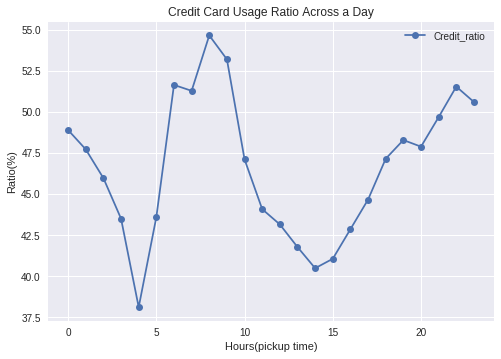

,Tip_mean,Credit_ratio
Tip_mean,1.000000,0.806472
Credit_ratio,0.806472,1.000000


In [28]:
# plot credit usage ratio
p1 = trip_df_pickup.plot.line(y = ['Credit_ratio'], marker='o')
p1.set_xlabel('Hours(pickup time)')
p1.set_ylabel('Ratio(%)')
p1.set_title('Credit Card Usage Ratio Across a Day')
plt.show()

# Credit card usage vs tip percentage correlation
# print(trip_df_pickup.columns)
data_temp = trip_df_pickup[['Tip_mean','Credit_ratio']]
data_temp.corr(method='pearson')

#### Findings:
* The mean and median values have a same trend and all medians are less than means. That indicates the distributions are right skewed.
* Passengers would like to arrange long trip between 4am to 7am. From the Speed plot, before 7 am, few traffic congestion happened and that might be the reason why passengers would like to choose this time for longer trip. The rush hour starts from 7am in the morning since there is a big jump of the speed and a peak showing up in the trip duration plot. Another rush hours happened between 4pm to 5 pm since people get back to home.
* The tip mean plot people would like to give more tips during 5am to 9am for early trips or rush hour. Another peak for tip happened after 9pm.
* Extra charges usually happened before 6am because of early trips and after 4 pm due to the rush hours.
* The best business time for drivers to get more tips and business are 5am-6am and after 9pm. The reason is that these time duration will have less traffic congestion, and passengers would like to pay more tips and surcharges.
* According to the credit card usage plot, passengers would like to use credit card between 6am to 9am and after 9 pm. The reason of the first peak might be the passengers are in a hurry to go to work or try to make early appointment. Using credit card is quicker than paying with cash. For the next peak time (after 9pm), that might be their cash was running out or for security consideration (avoiding robbery).
* From the driver's perspective, accepting credit card could bring them more tips when looking at the tip amount mean and credit card usage rate. They have a high correlation value of 0.8065. Why is the ratio so low except the peak hours? That is because the tax avoidance. (https://www.quora.com/Why-do-NYC-cab-drivers-hate-taking-credit-cards). Credit card companies have many ways to encourage drivers to accept credit card payments, such as offering more discounts at specific times of the day, giving extra rewards if they accept 30 credit card payments per day, etc..

#### Notes:
* For the above analysis, we used pickup hour to group the data instead of using dropoff hour since it is more related to customer behavior.

### Let's do some analysis on airport trips.(Q3(b))
I assumed there were three primary airports in NYC including JFK, EWR, and LAG. We need to know the latitude and longitude of these airport and assign labels to the data frame. 

In [31]:
# count # of samples for each airport
print(data_green_clean['Airport_pick_or_drop'].value_counts())

# calculate total mount mean for each airport
airport_ave_fare = data_green_clean[['Total_amount', 'Airport_pick_or_drop']].groupby('Airport_pick_or_drop').mean()
print(airport_ave_fare)

0    1468601
1      12908
3      11736
2        692
Name: Airport_pick_or_drop, dtype: int64
                      Total_amount
Airport_pick_or_drop              
0                        14.684134
1                        48.740720
2                        97.907298
3                        25.531270


# Question 4
** - Build a derived variable for tip as a percentage of the total fare.**

(array([735842., 735846., 735850., 735854., 735858., 735862., 735866.,
        735870., 735872.]), <a list of 9 Text xticklabel objects>)

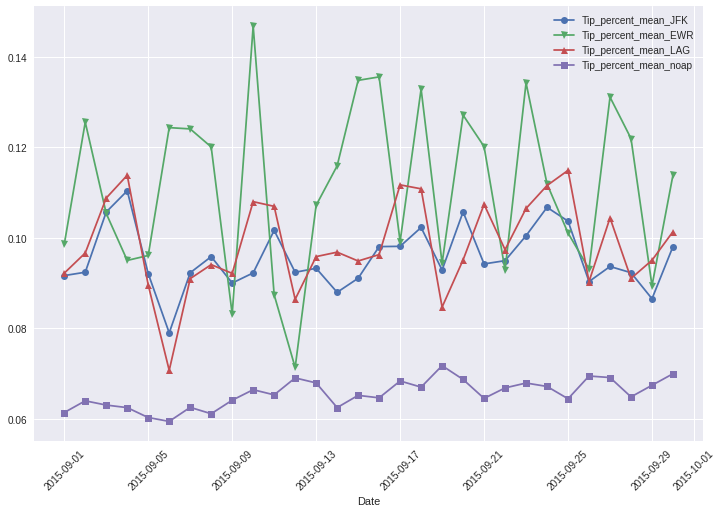

In [33]:
# new dataframe for data group by date
trip_byday = pd.DataFrame(columns=['Tip_percent_mean', 'Date'])
trip_byday['Tip_percent_mean'] = data_green_clean[['Tip_percentage', 'pickup_date']].groupby('pickup_date').mean()['Tip_percentage'].values
trip_byday['Date'] = pd.unique(data_green_clean['pickup_date'])
# print(trip_byday)

# group by pickup date and airport
trip_bydayap= data_green_clean[['Tip_percentage', 'Airport_pick_or_drop', 'pickup_date']].groupby(['pickup_date', 'Airport_pick_or_drop']).mean().reset_index()

trip_byday['Tip_percent_mean_JFK'] = trip_bydayap['Tip_percentage'][trip_bydayap['Airport_pick_or_drop'] == 1].values
trip_byday['Tip_percent_mean_EWR'] = trip_bydayap['Tip_percentage'][trip_bydayap['Airport_pick_or_drop'] == 2].values
trip_byday['Tip_percent_mean_LAG'] = trip_bydayap['Tip_percentage'][trip_bydayap['Airport_pick_or_drop'] == 3].values
trip_byday['Tip_percent_mean_noap'] = trip_bydayap['Tip_percentage'][trip_bydayap['Airport_pick_or_drop'] == 0].values

# plot tip percentages and compare them
a = trip_byday[['Date', 'Tip_percent_mean_JFK', 'Tip_percent_mean_EWR', 'Tip_percent_mean_LAG', 'Tip_percent_mean_noap']].copy()
# print(trip_byday)

fig,ax = plt.subplots(1,1,figsize = (12,8)) 
a.plot.line(x=['Date'], ax=ax, style=['o-','v-','^-','s-'])
plt.xticks(rotation=45)

#### Findings:
* JFK and LAG take more services in NYC. EWR is far away from the NYC downtown area and take fewer services than JFK and LAG.
* The tip percentages of JFK and LAG are quite similar.
* Passengers would like to pay more tips for airport trips than regular trips.
* Peaks occur on EWR data. However, However, I can't conclude that people are willing to pay more for EWR travel because EWR data only has 692 samples, far less than other data. We cannot draw any conclusions by comparing this unbalanced data.


** - Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). Provide an estimate of performance using an appropriate sample, and show your work. **

Before training the model, let's look at the correlation map to find if some features should be removed.

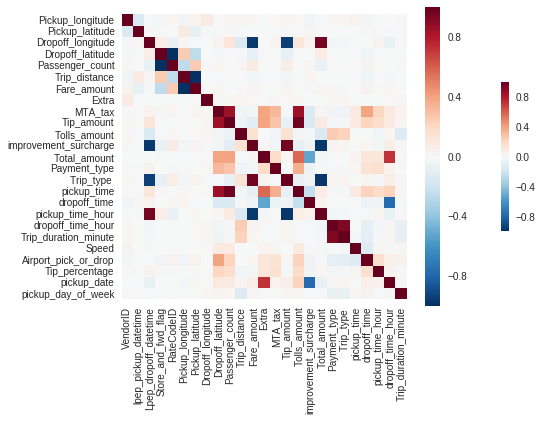

In [37]:
# correlation
data_temp = data_green_clean.copy()
corr = data_temp.corr()
sns.heatmap(corr, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.heatmap(corr, xticklabels=list(data_temp.columns),yticklabels=list(data_temp.columns))

According to the correlation map, it easily to find that the total fare is highly correlated to tip_percentage. 

In [55]:
# initial H2O model
h2o.init()
h2o.remove_all()  
data_h2o = h2o.H2OFrame(data_green_clean)

# divide the dataset into three pieces: 60% for training, 20% for testing, 20% for CV
train, valid, test = data_h2o.split_frame([0.6, 0.2], seed=1234)
inFeature = list(data_green_clean.columns)

# First model: with Total_amount in input features
inFeature.remove('Tip_percentage')
print(inFeature)

# Second model: remove Total_amount from the input feature
inFeature.remove('Tip_amount')
print(inFeature)

outFeature = 'Tip_percentage'

# Define model, use 10 folds cross validation
model= H2ORandomForestEstimator(ntrees=50, max_depth=20, nfolds=10)

# Train model
model.train(x=inFeature, y=outFeature, training_frame=train, validation_frame=valid)

# Model performance
performance = model.model_performance(test_data=test)
print(performance)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,3 hours 52 mins
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.4
H2O cluster version age:,16 days
H2O cluster name:,H2O_from_python_unknownUser_tek17f
H2O cluster total nodes:,1
H2O cluster free memory:,1.951 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude', 'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude', 'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax', 'Tip_amount', 'Tolls_amount', 'improvement_surcharge', 'Total_amount', 'Payment_type', 'Trip_type ', 'pickup_time', 'dropoff_time', 'pickup_time_hour', 'dropoff_time_hour', 'Trip_duration_minute', 'Speed', 'Airport_pick_or_drop', 'pickup_date', 'pickup_day_of_week']
['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude', 'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude', 'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax', 'Tolls_amount', 'improvement_surcharge', 'Total_amount', 'Payment_type', 'Trip_type ', 'pickup_time', 'dropoff_time', 'pickup_time_hour', 'dropoff_time_ho

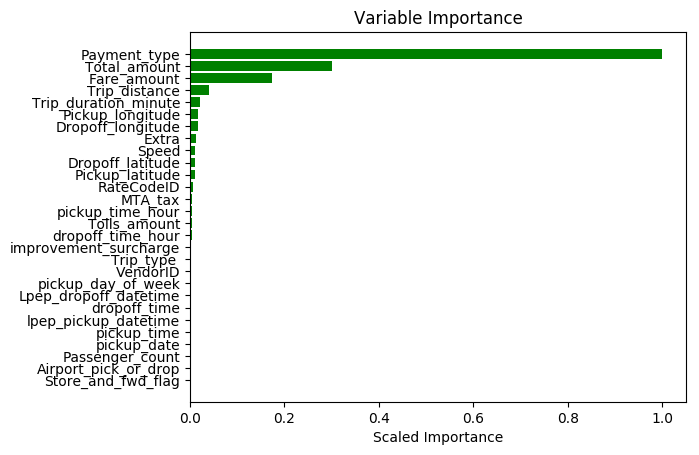

Model Summary: 


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,50.0,50.0,10792992.0000000,20.0,20.0,20.0,10849.0,25414.0,17194.22


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2019-03-04 22:20:14,1:04:07.352,0.0,nan,nan,nan,nan,nan,nan
,2019-03-04 22:20:18,1:04:11.415,1.0,0.0290872,0.0108799,0.0008461,0.0293092,0.0108719,0.0008590
,2019-03-04 22:20:23,1:04:16.538,2.0,0.0279246,0.0103195,0.0007798,0.0236548,0.0093884,0.0005596
,2019-03-04 22:20:28,1:04:21.899,3.0,0.0284754,0.0107583,0.0008108,0.0229875,0.0094754,0.0005284
,2019-03-04 22:20:36,1:04:29.926,5.0,0.0247421,0.0094163,0.0006122,0.0194162,0.0081273,0.0003770
,2019-03-04 22:20:46,1:04:39.959,7.0,0.0220490,0.0085532,0.0004862,0.0175830,0.0073954,0.0003092
,2019-03-04 22:20:58,1:04:51.085,9.0,0.0214382,0.0085502,0.0004596,0.0176262,0.0075131,0.0003107
,2019-03-04 22:21:10,1:05:03.898,12.0,0.0200666,0.0081858,0.0004027,0.0172737,0.0073730,0.0002984
,2019-03-04 22:21:29,1:05:22.361,16.0,0.0186956,0.0078046,0.0003495,0.0166415,0.0071562,0.0002769
,2019-03-04 22:21:49,1:05:42.124,20.0,0.0180449,0.0076010,0.0003256,0.0164098,0.0070783,0.0002693



ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.0002543301231287757
RMSE: 0.015947730971168774
MAE: 0.006767583941538578
RMSLE: 0.013922375551243987
Mean Residual Deviance: 0.0002543301231287757

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.0002394907466546559
RMSE: 0.015475488575636503
MAE: 0.006578107990041062
RMSLE: 0.013435799365116213
Mean Residual Deviance: 0.0002394907466546559

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.00024298903030704535
RMSE: 0.015588105411083329
MAE: 0.006718477329876463
RMSLE: 0.013615259251207311
Mean Residual Deviance: 0.00024298903030704535
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
mae,0.0067183,0.0001269,0.0071362,0.0066736,0.0065805,0.0069242,0.0067771,0.0066171,0.0065146,0.0065554,0.0067330,0.0066716
mean_residual_deviance,0.0002430,0.0000110,0.0002838,0.0002322,0.0002338,0.0002551,0.0002454,0.0002412,0.0002261,0.0002340,0.0002421,0.0002360
mse,0.0002430,0.0000110,0.0002838,0.0002322,0.0002338,0.0002551,0.0002454,0.0002412,0.0002261,0.0002340,0.0002421,0.0002360
r2,0.9689394,0.0014788,0.9632512,0.9707276,0.9697115,0.9677197,0.9686805,0.9690521,0.9707338,0.970279,0.9694215,0.9698169
residual_deviance,0.0002430,0.0000110,0.0002838,0.0002322,0.0002338,0.0002551,0.0002454,0.0002412,0.0002261,0.0002340,0.0002421,0.0002360
rmse,0.0155798,0.0003460,0.0168478,0.0152369,0.0152891,0.0159703,0.0156659,0.0155300,0.0150368,0.0152979,0.0155610,0.0153628
rmsle,0.0136089,0.0002849,0.0146307,0.0132692,0.0134375,0.0139824,0.0136956,0.0135397,0.0131773,0.0133554,0.0135652,0.0134359


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Payment_type,140124.4531250,1.0,0.6043342
Total_amount,42064.5273438,0.3001941,0.1814175
Fare_amount,24357.8515625,0.1738301,0.1050515
Trip_distance,5717.7636719,0.0408049,0.0246598
Trip_duration_minute,2857.9082031,0.0203955,0.0123257
---,---,---,---
pickup_time,168.0291595,0.0011991,0.0007247
pickup_date,166.9269562,0.0011913,0.0007199
Passenger_count,113.2917328,0.0008085,0.0004886
Airport_pick_or_drop,96.4490280,0.0006883,0.0004160



See the whole table with table.as_data_frame()
{'__meta': {'schema_version': 3, 'schema_name': 'DRFModelV3', 'schema_type': 'DRFModel'}, 'model_id': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'DRF_model_python_1551720168961_3', 'type': 'Key<Model>', 'URL': '/3/Models/DRF_model_python_1551720168961_3'}, 'algo': 'drf', 'algo_full_name': 'Distributed Random Forest', 'response_column_name': 'Tip_percentage', 'data_frame': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_13_sid_b371', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_13_sid_b371'}, 'timestamp': 1551738260802, 'have_pojo': True, 'have_mojo': True, 'parameters': [{'__meta': {'schema_version': 3, 'schema_name': 'ModelParameterSchemaV3', 'schema_type': 'Iced'}, 'name': 'model_id', 'label': 'model_id', 'help': 'Destination id for this model; auto-generated if not specified.', 'required': False, 'type': 'Key<Model>', 'default

In [56]:
# plot the importance
plt.rcdefaults()
fig, ax = plt.subplots()
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()
print(model._model_json)

# Question 5 (Option A: Distribution)
** -Build a derived variable representing the average speed over the course of a trip**

** - Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September? If you decide they are not the same, can you form a hypothesis regarding why they differ? **

Text(0, 0.5, 'Speed (mph)')

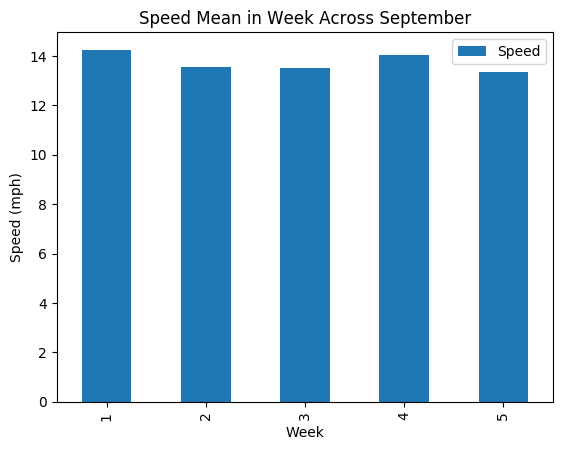

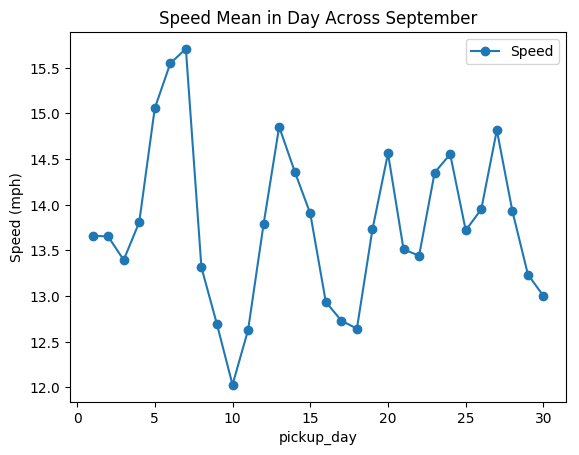

In [57]:
# feature extration: mean speed vs weeks
def feature_week(df):
    first_week = dt.datetime(2015,9,1).isocalendar()[1]
    df['Week'] = df['pickup_time'].apply(lambda x: x.isocalendar()[1]) - first_week + 1
    df_week = df[['Speed', 'Week']].groupby(['Week']).mean()
    return df_week

# feature extration: mean speed vs days
def feature_day(df):
    df['pickup_day'] = df['pickup_time'].apply(lambda x:x.day)
    df_day = df[['Speed', 'pickup_day']].groupby(['pickup_day']).mean()
    return df_day

# plot speed mean group by week
df_week = feature_week(data_green_clean)
df_day = feature_day(data_green_clean)
p1 = df_week.plot.bar()
p1.set_title('Speed Mean in Week Across September')
p1.set_ylabel('Speed (mph)')

# plot speed mean group by day
p2 = df_day.plot.line(marker='o')
p2.set_title('Speed Mean in Day Across September')
p2.set_ylabel('Speed (mph)')

#### Findings:
* The speed mean of Week 2, 3, and 4 are quite close and that of the other weeks are close.
* I was expecting the trend of speed mean across a week should like two peaks present on Saturday and Sunday and other days should have lower mean values and the trend should be flat. The actual trend does not match my initial expectation.
* However, it cannot be concluded that the average trip speeds are different in all weeks of September. I still need to look at their distributions.

### Let's look at the distributions

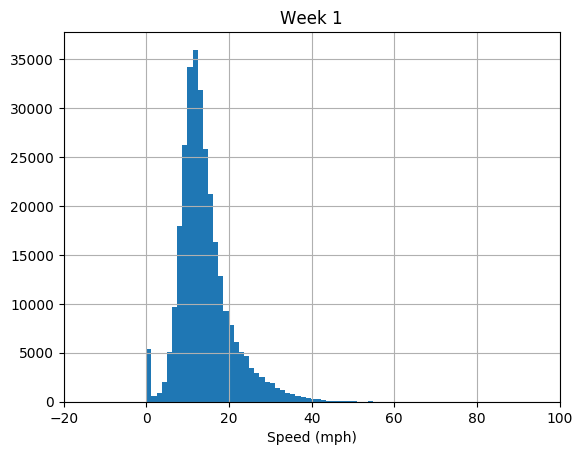

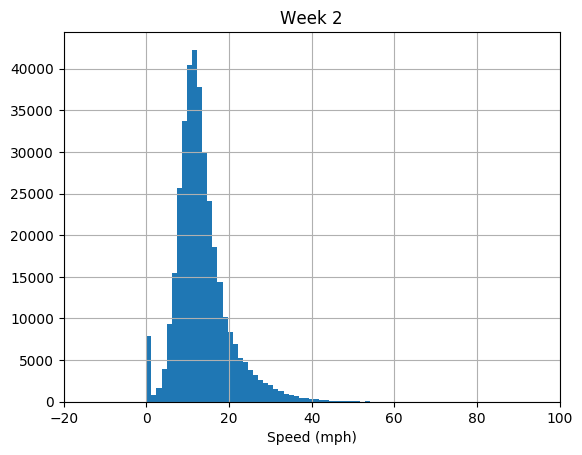

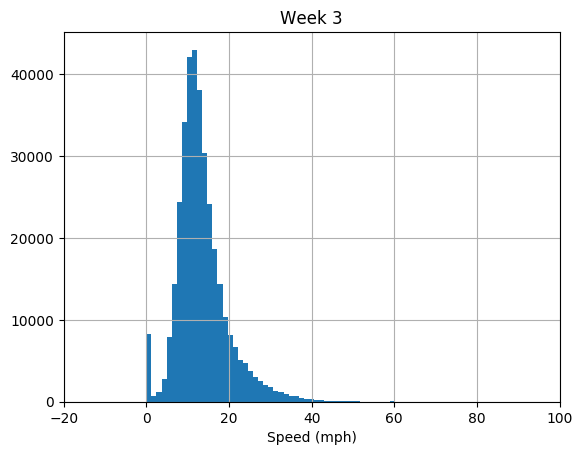

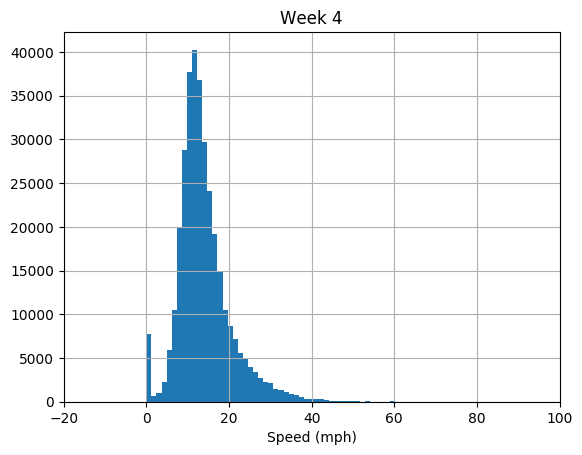

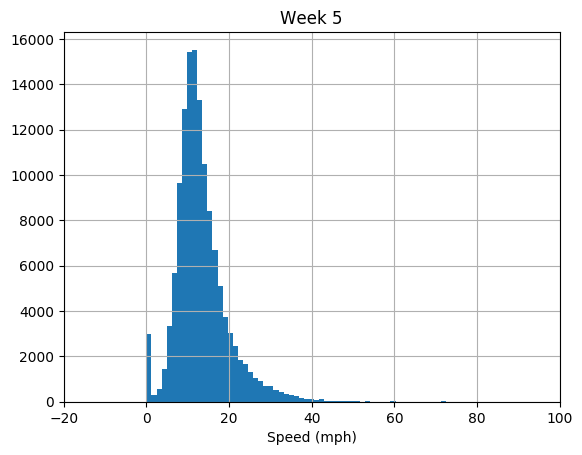

In [58]:
# pull out raw data for each week
def data_week(df):
    first_week = dt.datetime(2015,9,1).isocalendar()[1]
    df['Week'] = df['pickup_time'].apply(lambda x: x.isocalendar()[1]) - first_week + 1
    df_week_raw = {}
    df_week_raw['1'] = df[['Speed', 'Week']].groupby(['Week']).get_group(1)
    df_week_raw['2'] = df[['Speed', 'Week']].groupby(['Week']).get_group(2)
    df_week_raw['3'] = df[['Speed', 'Week']].groupby(['Week']).get_group(3)
    df_week_raw['4'] = df[['Speed', 'Week']].groupby(['Week']).get_group(4)
    df_week_raw['5'] = df[['Speed', 'Week']].groupby(['Week']).get_group(5)
    return df_week_raw

df_week_raw = data_week(data_green_clean)

#plot the speed distribution for each week and check if the samples are normally distributed, the distributions are skewed right.
for iWeek in range(1,6):
    bins = 200
    ax = df_week_raw[str(iWeek)]['Speed'].hist(bins=bins)
    ax.set_xlim(-20,100)
    ax.set_title('Week '+str(iWeek))
    ax.set_xlabel('Speed (mph)')
    plt.show()


### Mann-Whitney U Hypothesis Test

In [59]:
# the samples don't follow normal distribution, so using Mann-Whitney U Test to check if distributions are identical or not
for iWeek in range(1,6):
    for jWeek in range(1,6):
        if iWeek != jWeek:
            [stat, p] = mannwhitneyu(df_week_raw[str(iWeek)]['Speed'], df_week_raw[str(jWeek)]['Speed'])
            print(str(iWeek)+' vs. '+str(jWeek) + ' p-value = ' + str(p))

1 vs. 2 p-value = 0.0
1 vs. 3 p-value = 0.0
1 vs. 4 p-value = 1.952041896248295e-29
1 vs. 5 p-value = 0.0
2 vs. 1 p-value = 0.0
2 vs. 3 p-value = 0.0008436692753830827
2 vs. 4 p-value = 0.0
2 vs. 5 p-value = 3.2005719615472883e-18
3 vs. 1 p-value = 0.0
3 vs. 2 p-value = 0.0008436692753830827
3 vs. 4 p-value = 0.0
3 vs. 5 p-value = 7.026456346314438e-29
4 vs. 1 p-value = 1.952041896248295e-29
4 vs. 2 p-value = 0.0
4 vs. 3 p-value = 0.0
4 vs. 5 p-value = 0.0
5 vs. 1 p-value = 0.0
5 vs. 2 p-value = 3.2005719615472883e-18
5 vs. 3 p-value = 7.026456346314438e-29
5 vs. 4 p-value = 0.0


#### Findings:
The p-values are extremely close to 0. Therefore, we could conclude that the speed distributions are significantly different because the null hypothesis that they are identical is rejected with 95% level of confidence.

### Polynomial regression for Speed mean vs. Hours
I selected fifteen hypothesis models with degree of 1 to 15 and used R2 and RMSE (Root Mean Square Error) as the evaluation metrics.

#### Note: 
* R2 is often used for explanatory purposes and explains how well your selected independent variable(s) explain the variability in your dependent variable(s). Higher R2, better is the model. [1]
* RMSE represents the sample standard deviation of the residuals. Smaller RMSE, better is the model.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


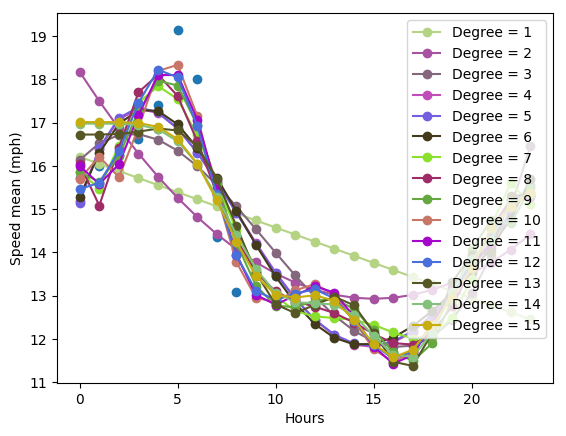

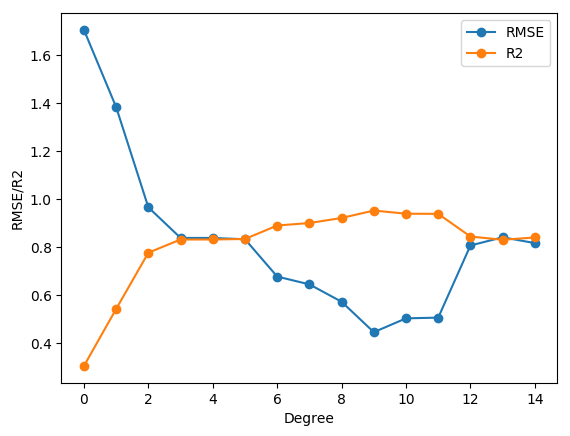

In [73]:
x = np.arange(24)

# scatter plot of speed mean
p1 = plt.figure()
ax1 = p1.add_subplot(111)
ax1.scatter(Hours, trip_df_pickup['Speed_mean'])
y = trip_df_pickup['Speed_mean']
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

degree = 15
rmse = [None]*degree
r2 = [None]*degree
# for loop for polynomial fitting and store RMSE and R2
for iDegree in range(1, degree+1):
    polynomial_features= PolynomialFeatures(degree=iDegree)
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    rmse[iDegree-1] = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2[iDegree-1] = r2_score(y,y_poly_pred)
#     print(rmse)
#     print(r2)
    plt.plot(x, y_poly_pred, color=np.random.rand(3,), marker = 'o')
ax1.set_xlabel('Hours') 
ax1.set_ylabel('Speed mean (mph)')
ax1.legend(['Degree = 1', 'Degree = 2','Degree = 3','Degree = 4','Degree = 5', 'Degree = 6', \
           'Degree = 7','Degree = 8','Degree = 9','Degree = 10','Degree = 11','Degree = 12', \
           'Degree = 13','Degree = 14','Degree = 15'])
# plot R2 and RMSE
p2 = plt.figure()
ax2 = p2.add_subplot(111)
plt.plot(rmse, marker = 'o')
plt.plot(r2, marker = 'o')
ax2.set_xlabel('Degree')
ax2.set_ylabel('RMSE/R2')
ax2.legend(['RMSE', 'R2'])

#### Finding:
* The best fitting performance that has the minimum RMSE and highest R2 is achieved at degree = 10.
* As the degrees going up after 10, the RMSE increases and R2 decrease. That means the fitting is going to be worse with a higher degree. We could conclude that a higher degree does not mean higher fitting performance.

## Conclusions
In this project, I analyzed the NYC green data of 2015 September. Data download was done programmatically. Data cleaning, feature engineering, predictive modeling, and performance evaluation were done. I applied a random forest algorithm to predict the tip_percentage, two models were trained since it is necessary to compare the model performance when including and excluding highly correlated features. The model with tip_amount achieve a pretty promising results of MAE and RMSE. As I expected, tip_amount made a greatest contribution to the prediction. When I remove the tip_amount from the input features, the results were acceptable, but worse than the first model. 

## Future Work
* In this report, I was including some suggestions for encouraging driver accepting credit cards payments. More data analysis based on other years' data should be done in the future. For example, finding out the trend of credit card payment ratio over 10 years. If it is increasing or decreasing over years, a root cause analysis should be done to help Capital One improve its revenue from Taxi business.

* From the model perspective, I only use random forest regression to predict the tip percentage. Although I used different features (with and without tip amount) to train the predictive model, more explorations are needed. For example, using other models, such as XGboost, light GBM, which are widely used and popular in the data science area. In this case, I use the default parameters in H2O package since fine-tuning the parameters is time-consuming. I believe the result of the second model will be improved with fine-tuning.

* From the problem definition perspective, I considered the problem a regression problem in this report. The problem also could be a classification problem. For example, separating the people who will give more tips (15% and up) and fewer tips (below 15%), or the pickup location where people are willing to pay more tips. I believe this kind of analysis will definitely benefit drivers and also bring Capital one potential revenue.

## Reference
* https://www.quora.com/Why-do-NYC-cab-drivers-hate-taking-credit-cards
* http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/drf.html
* https://www.quora.com/Why-would-one-use-H2O-ai-over-scikit-learn-machine-learning-tool
* https://github.com/szilard/benchm-ml
* https://github.com/kthouz/NYC_Green_Taxi
* http://nymag.com/nymetro/urban/features/taxi/n_20286/
* https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/
